# Subject 2: Purchasing power of English workers from the 16th to the 19th century

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import isoweek

William Playfair was one of the pioneers of the graphical presentation of data, being credited in particular with the invention of the histogram. One of his famous graphs, taken from his book "A Letter on Our Agricultural Distresses, Their Causes and Remedies", shows the evolution of the wheat price and average salaries from 1565 to 1821. First, we will replicate his famous graph and then present alternative versions of the graph to improve the readability.

## Plotting the original graph

The data used by Playfair are available on [github](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html) in a csv format using the url:

In [2]:
data_url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv'

We load the data. The first column and empty row are deleted. The array is made of three columns : the year, the wheat price (in Shilling/quarter) and the wages (in Shilling/week).

In [3]:
raw_data = pd.read_csv(data_url)
data = raw_data.dropna().copy()
data.pop('Unnamed: 0')
data

Year  Wheat  Wages
0   1565   41.0   5.00
1   1570   45.0   5.05
2   1575   42.0   5.08
3   1580   49.0   5.12
4   1585   41.5   5.15
5   1590   47.0   5.25
6   1595   64.0   5.54
7   1600   27.0   5.61
8   1605   33.0   5.69
9   1610   32.0   5.78
10  1615   33.0   5.94
11  1620   35.0   6.01
12  1625   33.0   6.12
13  1630   45.0   6.22
14  1635   33.0   6.30
15  1640   39.0   6.37
16  1645   53.0   6.45
17  1650   42.0   6.50
18  1655   40.5   6.60
19  1660   46.5   6.75
20  1665   32.0   6.80
21  1670   37.0   6.90
22  1675   43.0   7.00
23  1680   35.0   7.30
24  1685   27.0   7.60
25  1690   40.0   8.00
26  1695   50.0   8.50
27  1700   30.0   9.00
28  1705   32.0  10.00
29  1710   44.0  11.00
30  1715   33.0  11.75
31  1720   29.0  12.50
32  1725   39.0  13.00
33  1730   26.0  13.30
34  1735   32.0  13.60
35  1740   27.0  14.00
36  1745   27.5  14.50
37  1750   31.0  15.00
38  1755   35.5  15.70
39  1760   31.0  16.50
40  1765   43.0  17.60
41  1770   47.0  18.50
42  1775   44.0  19.50
43  1780   46.0  21.00
44  1785   42.0  23.00
45  1790   47.5  25.50
46  1795   76.0  27.50
47  1800   79.0  28.50
48  1805   81.0  29.50
49  1810   99.0  30.00

We can replace the index by the column year and sort by increasing years. We verify that the gap between two points is not more than 5 years:

In [4]:
sorted_data =  data.set_index('Year').sort_index()
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    assert (p2-p1)<=5 

**Eventually plotting Playfair's graph:**

Text(0,0.5,'Price of a quarter of wheat (Shillings)')

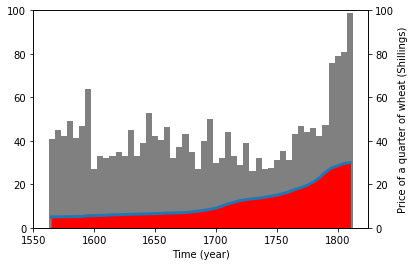

In [5]:
plt.figure()
ax1 = plt.gca()
ax1.set_xlabel('Time (year)')
ax1.plot(sorted_data['Wages'], linewidth=3)
ax1.fill_between(sorted_data.index, 0, sorted_data['Wages'],
                 color='red')
ax1.bar(sorted_data.index, sorted_data['Wheat'], width=5,
        color='grey', zorder=0)

ax2 = ax1.twinx()
ax1.set_ylim([0, 100])
ax2.set_ylim([0, 100])
ax2.set_ylabel('Price of a quarter of wheat (Shillings)')


## Re-labeling the axis

The left and right axis can be labeled with the proper units 'Shillings/week' and 'Shillings/quarter', resp.

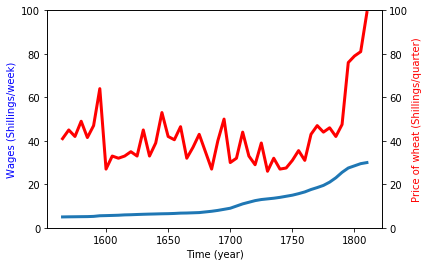

In [6]:
plt.figure()
ax1 = plt.gca()
ax1.set_xlabel('Time (year)')
ax1.set_ylabel('Wages (Shillings/week)', color='blue')
ax1.plot(sorted_data['Wages'], linewidth=3)
ax2 = ax1.twinx()
ax1.set_ylim([0, 100])
ax2.set_ylim([0, 100])
ax2.set_ylabel('Price of wheat (Shillings/quarter)', 
               color='red')
ax2.plot(sorted_data.index, sorted_data['Wheat'],
         color='red', zorder=0, linewidth=3)

## Plot the purchasing power of workers

The purchasing power can be calculated as the ratio of the wages over the prices of wheat. We plot it as a function of time.

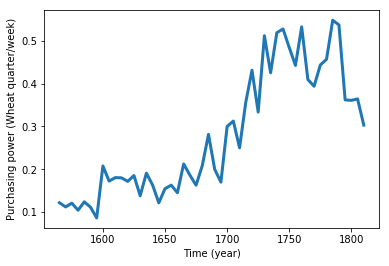

In [7]:
plt.figure()
ax1 = plt.gca()
ax1.set_xlabel('Time (year)')
ax1.set_ylabel('Purchasing power (Wheat quarter/week)')
ax1.plot(sorted_data['Wages']/sorted_data['Wheat'], linewidth=3)

**This graph seems to be the best way to represent the relative evolution of the price of wheat compared to the worker wages.**

## Scatter plot

Another way to present the data is to plot directly the wage versus the price of wheat, and write the year close to the data points:

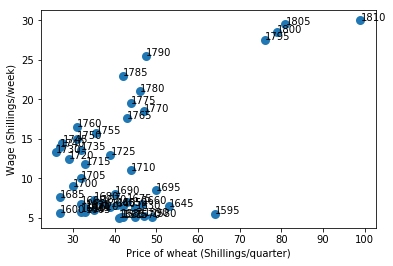

In [8]:
plt.figure()
ax1 = plt.gca()
ax1.set_xlabel('Price of wheat (Shillings/quarter)')
ax1.set_ylabel('Wage (Shillings/week)')

x = sorted_data['Wheat']
y = sorted_data['Wages']
ax1.scatter(x, y, linewidth=3)
for year in sorted_data.index:
    ax1.annotate(str(year),xy=(x[year], y[year]))

**The graph contains the same information but is not as readable as the purchasing power graph.**